# Data Exploration and Cleaning

This notebook covers essential data exploration steps to understand our dataset before cleaning.

## What we will do:
1. Load the data and check information
2. Look for missing values
3. Statistical Summary
4. Target Variable Analysis
5. Simple visualizations
6. Identify data quality issues


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plotting
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")


<Figure size 1000x600 with 0 Axes>

## 1. Load Data and Check Information


In [2]:
# Load the dataset
df = pd.read_csv('../../data/raw/train.csv')

# Check the shape of our data
print("Dataset shape (rows, columns):", df.shape)
print("\nFirst 5 rows:")
df.head()


Dataset shape (rows, columns): (1460, 81)

First 5 rows:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Get information about the dataset
print("Dataset information:")
print(f"Number of rows: {len(df)}")
print(f"Number of columns: {len(df.columns)}")
print(f"\nColumn names:")
print(df.columns.tolist())


Dataset information:
Number of rows: 1460
Number of columns: 81

Column names:
['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', '

In [4]:
# Check data types
print("Data types:")
df.info()


Data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 

## 2. Missing Values Analysis


In [5]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

# Create a summary of missing values
missing_summary = pd.DataFrame({
    'Missing_Count': missing_values,
    'Missing_Percent': missing_percent
})

# Show only columns with missing values
missing_summary = missing_summary[missing_summary['Missing_Count'] > 0]
missing_summary = missing_summary.sort_values('Missing_Percent', ascending=False)

print(f"Number of columns with missing values: {len(missing_summary)}")
print("\nColumns with missing values:")
print(missing_summary)


Number of columns with missing values: 19

Columns with missing values:
              Missing_Count  Missing_Percent
PoolQC                 1453        99.520548
MiscFeature            1406        96.301370
Alley                  1369        93.767123
Fence                  1179        80.753425
MasVnrType              872        59.726027
FireplaceQu             690        47.260274
LotFrontage             259        17.739726
GarageType               81         5.547945
GarageYrBlt              81         5.547945
GarageFinish             81         5.547945
GarageQual               81         5.547945
GarageCond               81         5.547945
BsmtExposure             38         2.602740
BsmtFinType2             38         2.602740
BsmtQual                 37         2.534247
BsmtCond                 37         2.534247
BsmtFinType1             37         2.534247
MasVnrArea                8         0.547945
Electrical                1         0.068493


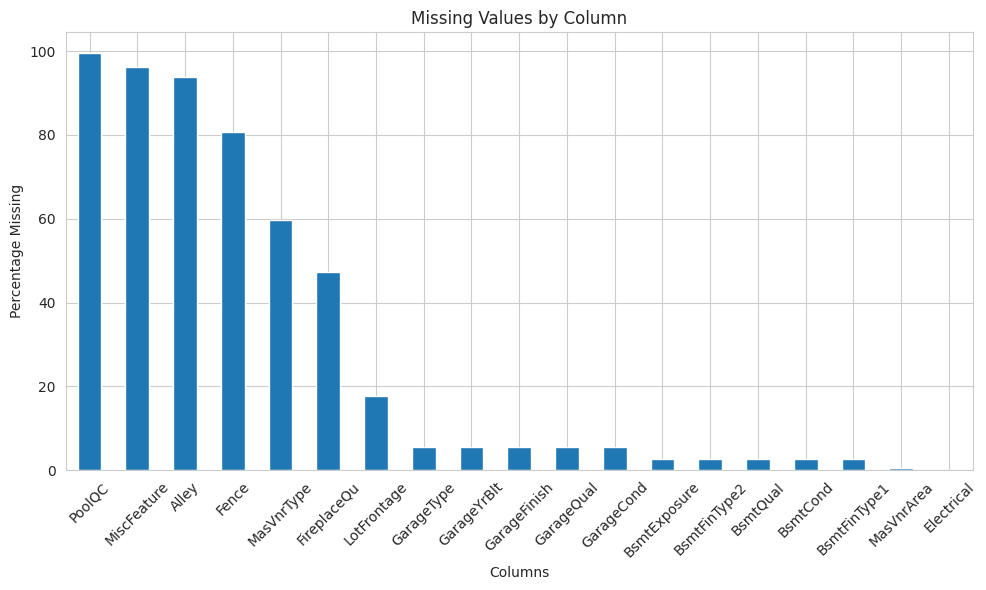

In [6]:
# Visualize missing values
if len(missing_summary) > 0:
    plt.figure(figsize=(10, 6))
    missing_summary['Missing_Percent'].plot(kind='bar')
    plt.title('Missing Values by Column')
    plt.ylabel('Percentage Missing')
    plt.xlabel('Columns')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found!")


## 3. Statistical Summary


In [7]:
# Get statistics for numeric columns
print("Statistics for numeric columns:")
df.describe()


Statistics for numeric columns:


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
# Count different data types
print("Data types count:")
print(df.dtypes.value_counts())

# Separate numeric and text columns
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
text_columns = df.select_dtypes(include=[object]).columns.tolist()

print(f"\nNumeric columns ({len(numeric_columns)}): {numeric_columns[:5]}...")
print(f"Text columns ({len(text_columns)}): {text_columns[:5]}...")


Data types count:
object     43
int64      35
float64     3
Name: count, dtype: int64

Numeric columns (38): ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual']...
Text columns (43): ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour']...


## 4. Target Variable Analysis


In [9]:
# Analyze the target variable (SalePrice)
target = 'SalePrice'

print(f"Target variable ({target}) statistics:")
print(f"Mean: ${df[target].mean():,.0f}")
print(f"Median: ${df[target].median():,.0f}")
print(f"Min: ${df[target].min():,.0f}")
print(f"Max: ${df[target].max():,.0f}")
print(f"Standard deviation: ${df[target].std():,.0f}")


Target variable (SalePrice) statistics:
Mean: $180,921
Median: $163,000
Min: $34,900
Max: $755,000
Standard deviation: $79,443


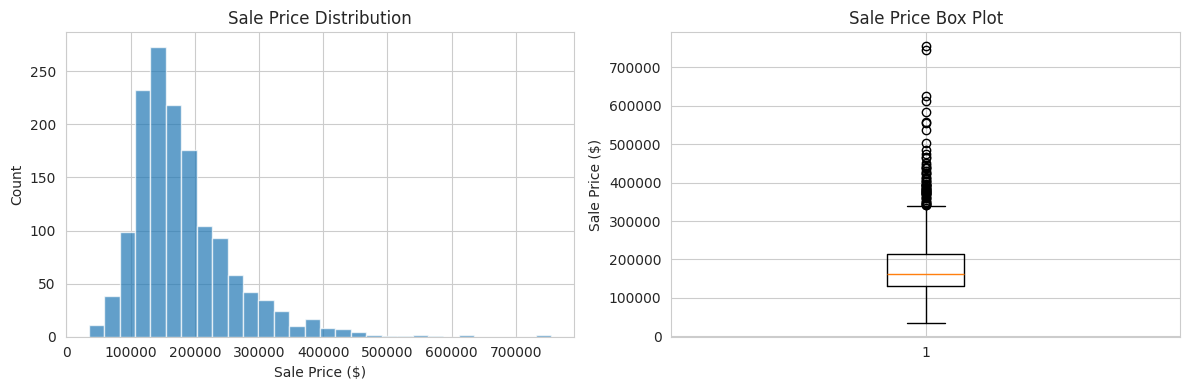

In [10]:
# Plot target variable distribution
plt.figure(figsize=(12, 4))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(df[target], bins=30, alpha=0.7)
plt.title('Sale Price Distribution')
plt.xlabel('Sale Price ($)')
plt.ylabel('Count')

# Box plot
plt.subplot(1, 2, 2)
plt.boxplot(df[target])
plt.title('Sale Price Box Plot')
plt.ylabel('Sale Price ($)')

plt.tight_layout()
plt.show()


## 5. Data Quality Checks


In [11]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Check for completely empty rows
empty_rows = df.isnull().all(axis=1).sum()
print(f"Number of completely empty rows: {empty_rows}")

# Check for unique values in each column
print("\nUnique values per column (first 10 columns):")
for col in df.columns[:10]:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count} unique values")


Number of duplicate rows: 0
Number of completely empty rows: 0

Unique values per column (first 10 columns):
Id: 1460 unique values
MSSubClass: 15 unique values
MSZoning: 5 unique values
LotFrontage: 110 unique values
LotArea: 1073 unique values
Street: 2 unique values
Alley: 2 unique values
LotShape: 4 unique values
LandContour: 4 unique values
Utilities: 2 unique values


## 6. Simple Visualizations


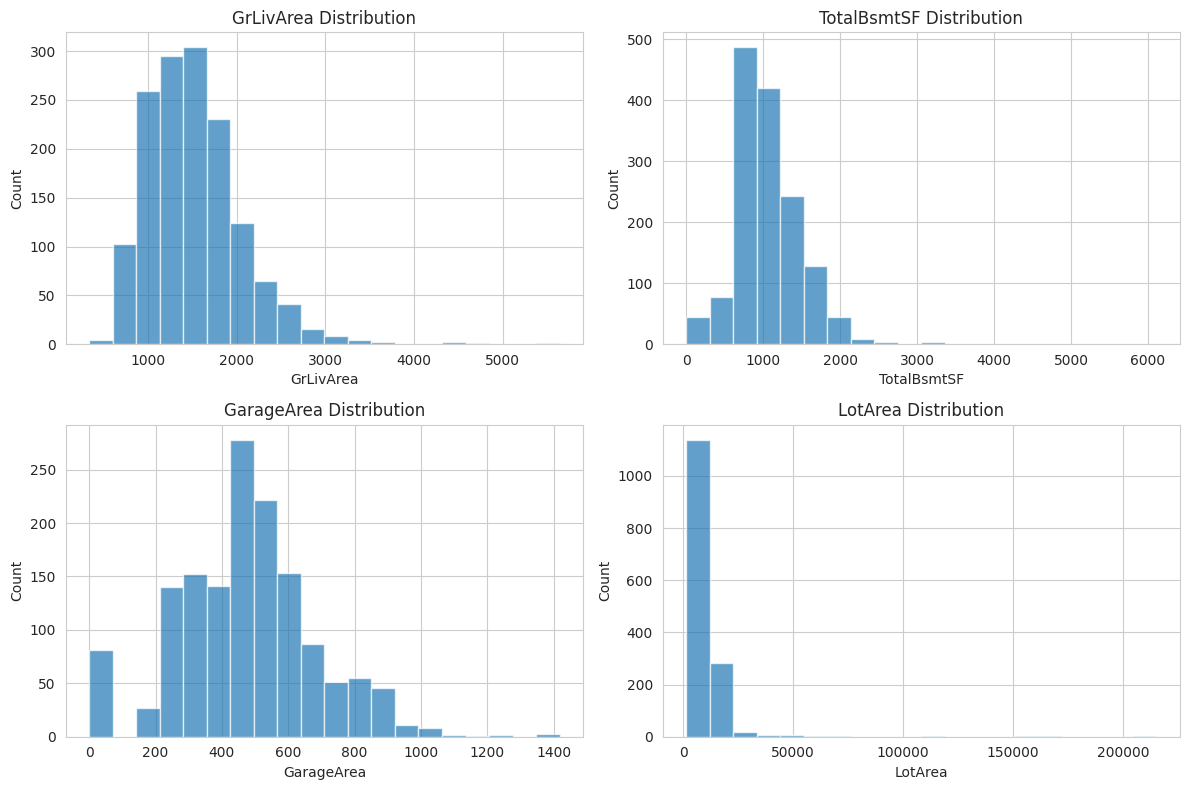

In [12]:
# Plot some important numeric variables
important_numeric = ['GrLivArea', 'TotalBsmtSF', 'GarageArea', 'LotArea']

plt.figure(figsize=(12, 8))
for i, col in enumerate(important_numeric, 1):
    if col in df.columns:
        plt.subplot(2, 2, i)
        plt.hist(df[col].dropna(), bins=20, alpha=0.7)
        plt.title(f'{col} Distribution')
        plt.xlabel(col)
        plt.ylabel('Count')

plt.tight_layout()
plt.show()


Log transformation may be needed for features above including SalePrice.


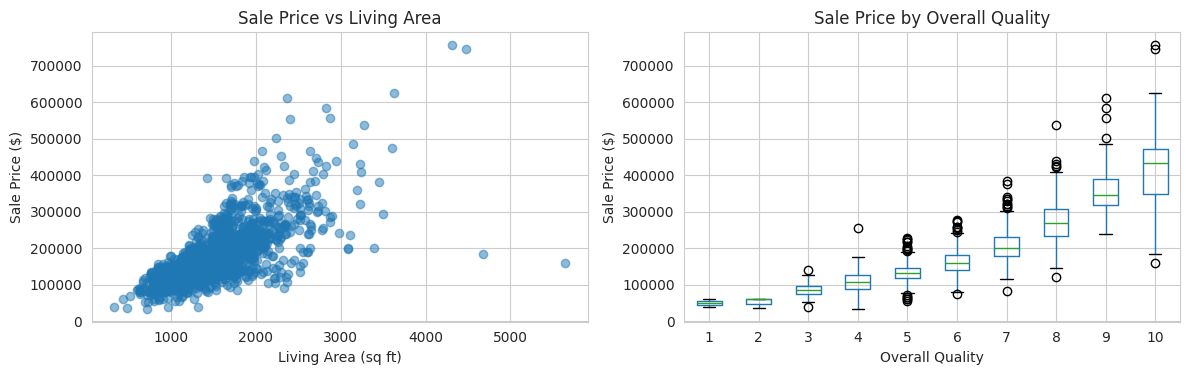

In [13]:
# Plot relationship between some variables and target
plt.figure(figsize=(12, 4))

# Price vs Living Area
plt.subplot(1, 2, 1)
plt.scatter(df['GrLivArea'], df['SalePrice'], alpha=0.5)
plt.xlabel('Living Area (sq ft)')
plt.ylabel('Sale Price ($)')
plt.title('Sale Price vs Living Area')

# Price vs Overall Quality
plt.subplot(1, 2, 2)
df.boxplot(column='SalePrice', by='OverallQual', ax=plt.gca())
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price ($)')
plt.title('Sale Price by Overall Quality')
plt.suptitle('')  # Remove default title

plt.tight_layout()
plt.show()


GrLivArea and OverallQual present some positive relationship with SalePrice.

## 7. Summary of Findings


In [14]:
# Create a summary
print("=== DATA EXPLORATION SUMMARY ===")
print(f"Dataset size: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"Missing values: {df.isnull().sum().sum()} total missing values")
print(f"Duplicate rows: {df.duplicated().sum()}")
print(f"Numeric columns: {len(numeric_columns)}")
print(f"Text columns: {len(text_columns)}")




=== DATA EXPLORATION SUMMARY ===
Dataset size: 1460 rows, 81 columns
Missing values: 7829 total missing values
Duplicate rows: 0
Numeric columns: 38
Text columns: 43
